In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('DEATH_EVENT', axis="columns"))

StandardScaler()

In [9]:
featured_scale = scaler.transform(df.drop('DEATH_EVENT', axis="columns"))

In [10]:
scales = pd.DataFrame(featured_scale, columns=df.columns[:-1])

In [11]:
scales.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scales, df['DEATH_EVENT'], test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test, pred))

[[33 11]
 [ 8  8]]


In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.42      0.50      0.46        16

    accuracy                           0.68        60
   macro avg       0.61      0.62      0.62        60
weighted avg       0.70      0.68      0.69        60



In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

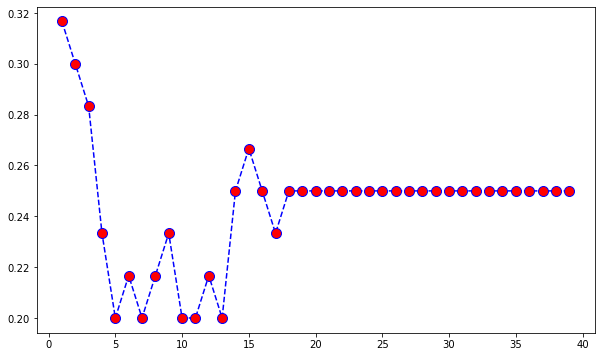

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', color='blue', linestyle='dashed', markerfacecolor='red', markersize=10)

In [41]:
# for K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix is :")
print("\n")
print(confusion_matrix(y_test, pred))
print('--------------------------------------------------------------')
print("Precision, Recall & F1 Scores is:")
print("\n")
print(classification_report(y_test, pred))

Confusion Matrix is :


[[33 11]
 [ 8  8]]
--------------------------------------------------------------
Precision, Recall & F1 Scores is:


              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.42      0.50      0.46        16

    accuracy                           0.68        60
   macro avg       0.61      0.62      0.62        60
weighted avg       0.70      0.68      0.69        60



In [42]:
# for K=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix is :")
print("\n")
print(confusion_matrix(y_test, pred))
print('--------------------------------------------------------------')
print("Precision, Recall & F1 Scores is:")
print("\n")
print(classification_report(y_test, pred))

Confusion Matrix is :


[[41  3]
 [ 9  7]]
--------------------------------------------------------------
Precision, Recall & F1 Scores is:


              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.70      0.44      0.54        16

    accuracy                           0.80        60
   macro avg       0.76      0.68      0.71        60
weighted avg       0.79      0.80      0.78        60

